In [563]:
# Python
import pandas as pd
import numpy as np
#
from pathlib import Path
from datetime import datetime
#
import xgboost
import utilities.xgboost_utils as xgboost_utils
#
import importlib
import utilities.train_test.train_test as train_test
import utilities.mpt_utils as mpt_utils
import utilities.variables as variables
import utilities.plots as plots

In [564]:
df = pd.read_csv('../../../data/df_monthly_prices_complete_euro.csv', index_col='Date')
df_pct = pd.read_csv('../../../data/df_monthly_returns_complete.csv', index_col='Date')
df_overview = pd.read_csv('../../../data/df_overview.csv', index_col=0)

## Create Tabular Time-Series DataFrame

In [565]:
importlib.reload(train_test)
#
file = Path("../../../data/df_tabular.csv")

if file.exists():
    df_tabular = pd.read_csv(file, index_col=0)
else:
    df_tabular = train_test.get_dataframe_tabular(df_pct)
    df_tabular.to_csv(file)

In [566]:
df_tabular

,month,year,date,m_return(t-11),m_return(t-10),m_return(t-9),m_return(t-8),m_return(t-7),m_return(t-6),m_return(t-5),...,m_return_target(t+4),m_return_target(t+5),m_return_target(t+6),m_return_target(t+7),m_return_target(t+8),m_return_target(t+9),m_return_target(t+10),m_return_target(t+11),m_return_target(t+12),stock_ticker_label
0,11,2000,2000-11-01,1.05,0.91,1.30,1.00,0.97,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.97,1.03,1.00,718
1,12,2000,2000-12-01,0.91,1.30,1.00,0.97,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,0.97,1.03,1.00,1.00,718
2,1,2001,2001-01-01,1.30,1.00,0.97,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,0.97,1.03,1.00,1.00,1.00,718
3,2,2001,2001-02-01,1.00,0.97,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,0.97,1.03,1.00,1.00,1.00,1.00,718
4,3,2001,2001-03-01,0.97,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,0.97,1.03,1.00,1.00,1.00,1.00,0.99,718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380947,4,2024,2024-04-01,0.97,0.98,1.04,0.98,0.98,0.99,1.03,...,1.00,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,962
380948,5,2024,2024-05-01,0.98,1.04,0.98,0.98,0.99,1.03,1.11,...,1.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,962
380949,6,2024,2024-06-01,1.04,0.98,0.98,0.99,1.03,1.11,1.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,962
380950,7,2024,2024-07-01,0.98,0.98,0.99,1.03,1.11,1.00,1.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,962


## Direct forecasting

## XGBoost Univariate - 1 Month

In [567]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)
importlib.reload(variables)
#
# df_tab_filtered = df_tabular.tail(variables.TRAIN_MONTH_NR*len(df.columns))
X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tabular, months=variables.TEST_MONTHS_NR)
#
model_1m, score_1m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:0.11705	validation_1-rmse:0.10011
[1]	validation_0-rmse:0.11690	validation_1-rmse:0.10009
[2]	validation_0-rmse:0.11683	validation_1-rmse:0.10007
[3]	validation_0-rmse:0.11673	validation_1-rmse:0.10007
[4]	validation_0-rmse:0.11663	validation_1-rmse:0.10006
[5]	validation_0-rmse:0.11642	validation_1-rmse:0.10005
[6]	validation_0-rmse:0.11635	validation_1-rmse:0.10004
[7]	validation_0-rmse:0.11625	validation_1-rmse:0.10003
[8]	validation_0-rmse:0.11617	validation_1-rmse:0.10002
[9]	validation_0-rmse:0.11608	validation_1-rmse:0.10002
[10]	validation_0-rmse:0.11602	validation_1-rmse:0.10001
[11]	validation_0-rmse:0.11588	validation_1-rmse:0.10001
[12]	validation_0-rmse:0.11582	validation_1-rmse:0.09998
[13]	validation_0-rmse:0.11576	validation_1-rmse:0.09998
[14]	validation_0-rmse:0.11571	validation_1-rmse:0.09996
[15]	validation_0-rmse:0.11565	validation_1-rmse:0.09997
[16]	validation_0-rmse:0.11558	validation_1-rmse:0.09994
[17]	validation_0-rmse:0.11547	validation

In [568]:
importlib.reload(train_test)
months_1m = 1
X_train_1m, y_train_1m, X_test_1m, y_test_1m, min_datestr = train_test.split_train_test_tabular(df_tabular, months=1)
# reset index
X_train_1m.reset_index(drop=True, inplace=True)
y_train_1m.reset_index(drop=True, inplace=True)
X_test_1m.reset_index(drop=True, inplace=True)
y_test_1m.reset_index(drop=True, inplace=True)

In [569]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last month
X_train_input_1m = X_train_1m.head(len(X_train_1m) - len(df_pct.columns) * months_1m)
# Get last month of the training dataset and use as input to predict the next month
X_test_input_1m = X_train_1m.tail(len(df_pct.columns) * months_1m)

# trained 
y_train_pred_1m = model_1m.predict(X_train_input_1m)
# predictions
y_test_pred_1m = model_1m.predict(X_test_input_1m)

### 1 month Actual vs Prediction

In [570]:
importlib.reload(mpt_utils)
#
y_train_mean_pred_1m, y_test_mean_pred_1m = mpt_utils.get_train_test_mean_pred(y_train_pred_1m, y_test_pred_1m, len(df_pct.columns))
#
plots.generate_timeseries_plot(df_pct, df_tabular, y_train_mean_pred_1m, y_test_mean_pred_1m)

284.0


#### Allocation - 1 Month

In [571]:
importlib.reload(mpt_utils)

# Get train true values followed with predicted month/s
y_train_1m_list = y_train_1m['m_return_target(t+1)'].tolist()
y_test_1m_list = y_test_pred_1m.tolist()
#
df_to_evaluate_1m = mpt_utils.get_df_from_pred_list(df_pct, y_train_1m_list, y_test_1m_list)
df_to_evaluate_1m = df_to_evaluate_1m - 1
df_to_evaluate_1m

,GME,2124.T,2491.T,2471.T,3046.T,PAT.DE,CROX,AOF.DE,SFQ.DE,DAN,...,KREF,HLN.L,DBX,BNL,CBL,KVUE,PSTL,NTST,BLCO,NBS.L
0,0.000000,-0.160000,-0.110000,0.000000,0.000000,0.00000,0.000000,-0.270000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
1,0.000000,-0.500000,-0.200000,-0.470000,-0.060000,-0.36000,-0.140000,0.280000,-0.10000,0.00000,...,0.030000,0.000000,0.01000,0.000000,-0.040000,0.000000,0.000000,0.00000,0.00000,-0.010000
2,0.030000,0.010000,-0.270000,-0.250000,0.000000,-0.29000,-0.300000,-0.160000,-0.11000,-0.14000,...,0.000000,0.000000,0.00000,-0.050000,0.000000,0.000000,0.000000,-0.03000,0.00000,-0.030000
3,0.000000,0.000000,0.000000,0.320000,0.000000,0.39000,0.340000,-0.270000,0.00000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
4,0.000000,1.180000,0.540000,0.390000,0.510000,0.28000,0.200000,0.290000,0.12000,0.17000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,1.090000,-0.130000,0.090000,0.080000,0.110000,-0.04000,0.250000,-0.080000,-0.03000,0.13000,...,0.010000,-0.040000,-0.03000,0.050000,0.020000,0.030000,-0.030000,0.03000,0.06000,-0.020000
282,0.070000,-0.010000,0.000000,-0.020000,0.060000,-0.11000,-0.060000,-0.020000,0.05000,-0.13000,...,-0.040000,-0.010000,0.00000,0.030000,0.060000,-0.050000,0.010000,-0.07000,-0.05000,0.000000
283,-0.080000,0.100000,0.020000,-0.020000,0.170000,0.07000,-0.080000,0.220000,0.08000,0.05000,...,0.300000,0.080000,0.06000,0.120000,0.120000,0.020000,0.120000,0.04000,0.19000,0.000000
284,0.030000,0.040000,-0.030000,0.120000,0.140000,0.12000,0.090000,0.020000,-0.08000,-0.11000,...,0.040000,0.090000,0.05000,0.050000,0.020000,0.190000,-0.030000,0.01000,-0.05000,0.000000


In [572]:
importlib.reload(mpt_utils)

weights_1m, mu_1m, S_1m, weights_all_1m = mpt_utils.portfolio_and_plot(df_to_evaluate_1m, df)

Expected annual return: 51.6%
Annual volatility: 11.2%
Sharpe Ratio: 4.43
-- Allocation --
{'6736.T': 6, 'LRN': 1, '8022.T': 2, 'AVGO': 1, 'ANF': 1, '7599.T': 13, '8129.T': 3, 'ASCL.L': 1, 'NVDA': 1, 'SFM': 1, 'AGYS': 1, 'MSI': 1, 'APP': 1, 'BRBY.L': 1, 'NL': 12, 'CVLT': 1, '9024.T': 3, '4732.T': 7, 'IDS.L': 1, '9766.T': 1, 'PNN.L': 1, '2327.T': 2, '8282.T': 6, '9101.T': 2, 'FTK.DE': 4, '6941.T': 3, '2433.T': 8, '7832.T': 3, 'HL.L': 1, '9869.T': 2, '7309.T': 1, '9468.T': 3, 'NEM.DE': 1, '9934.T': 2, 'STAA': 1, 'GBG.L': 1, '4324.T': 2, '8283.T': 1, 'BGC': 5, 'VSEC': 1, '7419.T': 4, '4568.T': 1, '3626.T': 2, 'GBF.DE': 1, 'PGR': 1, '7552.T': 2, '7951.T': 2, '8012.T': 2, '7906.T': 3, '9831.T': 16, '2790.T': 2, 'AMAL': 1, 'COP.DE': 3, '7846.T': 1, '2331.T': 7, '7483.T': 3, '7947.T': 2, '7936.T': 2, '9072.T': 1, '8074.T': 1, '9104.T': 1, '7915.T': 3, '9842.T': 3, '2733.T': 1, '8818.T': 3, '9260.T': 3, '4549.T': 2, 'MFA': 3, 'RELL': 3, '7762.T': 5, '5334.T': 1, '8086.T': 4, '9143.T': 2, '9434

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Overview - 1 Month

In [573]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_1m, mu_1m, S_1m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
6736.T,6,-0.072373,178.94%,31.39%,296.94%
LRN,1,-0.012119,18.58%,62.22%,75.45%
8022.T,2,-0.010763,-56.16%,75.44%,93.58%
AVGO,1,-0.003644,68.17%,83.55%,81.33%
ANF,1,-0.063644,261.18%,246.76%,130.59%
...,...,...,...,...,...
7575.T,1,0.008983,66.44%,19.33%,5.04%
6471.T,1,0.021186,-5.28%,6.27%,-12.75%
2874.T,1,0.037542,27.07%,30.54%,-14.93%
8897.T,2,0.020424,-14.71%,12.26%,12.31%


## XGBoost Univariate - 6 Months

In [574]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)
#
#df_tab_filtered = df_tabular.tail(variables.TRAIN_MONTH_NR*len(df.columns))
X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tabular, months=variables.TEST_MONTHS_NR, target_key='m_return_target(t+6)')
#
model_6m, score_6m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:0.11611	validation_1-rmse:0.09335
[1]	validation_0-rmse:0.11603	validation_1-rmse:0.09330
[2]	validation_0-rmse:0.11593	validation_1-rmse:0.09331
[3]	validation_0-rmse:0.11584	validation_1-rmse:0.09332
[4]	validation_0-rmse:0.11575	validation_1-rmse:0.09333
[5]	validation_0-rmse:0.11559	validation_1-rmse:0.09336
[6]	validation_0-rmse:0.11551	validation_1-rmse:0.09339
[7]	validation_0-rmse:0.11543	validation_1-rmse:0.09340
[8]	validation_0-rmse:0.11536	validation_1-rmse:0.09342
[9]	validation_0-rmse:0.11523	validation_1-rmse:0.09344
[10]	validation_0-rmse:0.11517	validation_1-rmse:0.09342
[11]	validation_0-rmse:0.11502	validation_1-rmse:0.09342
[12]	validation_0-rmse:0.11486	validation_1-rmse:0.09341
[13]	validation_0-rmse:0.11481	validation_1-rmse:0.09346
[14]	validation_0-rmse:0.11475	validation_1-rmse:0.09347
[15]	validation_0-rmse:0.11469	validation_1-rmse:0.09347
[16]	validation_0-rmse:0.11459	validation_1-rmse:0.09351
[17]	validation_0-rmse:0.11450	validation

In [575]:
months_6m = 6
X_train_6m, y_train_6m, X_test_6m, y_test_6m, min_datestr = train_test.split_train_test_tabular(df_tabular, months=6, target_key='m_return_target(t+6)')

In [576]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last 6 months
X_train_input_6m = X_train_6m.head(len(X_train_6m) - len(df_pct.columns)*months_6m)
# Get last 6 months of the training dataset and use as input to predict the next 6 months
X_test_input_6m = X_train_6m.tail(len(df_pct.columns)*months_6m)

# Trained 
y_train_pred_6m = model_6m.predict(X_train_input_6m)
# Predictions
y_test_pred_6m = model_6m.predict(X_test_input_6m)

### 6 Months Actual vs Prediction

In [577]:
importlib.reload(mpt_utils)
#
y_train_mean_pred_6m, y_test_mean_pred_6m = mpt_utils.get_train_test_mean_pred(y_train_pred_6m, y_test_pred_6m, len(df_pct.columns))
#
plots.generate_timeseries_plot(df_pct, df_tabular, y_train_mean_pred_6m, y_test_mean_pred_6m)

274.0


#### Allocation

In [578]:
# Get train true values followed with predicted month/s
y_train_6m_list = y_train_6m['m_return_target(t+6)'].tolist()
y_pred_6m_list = y_test_pred_6m.tolist()
#
df_to_evaluate_6m = mpt_utils.get_df_from_pred_list(df_pct, y_train_1m_list, y_pred_6m_list)
df_to_evaluate_6m = df_to_evaluate_6m - 1
df_to_evaluate_6m

,GME,2124.T,2491.T,2471.T,3046.T,PAT.DE,CROX,AOF.DE,SFQ.DE,DAN,...,KREF,HLN.L,DBX,BNL,CBL,KVUE,PSTL,NTST,BLCO,NBS.L
0,0.000000,-0.160000,-0.110000,0.000000,0.000000,0.000000,0.000000,-0.270000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,-0.500000,-0.200000,-0.470000,-0.060000,-0.360000,-0.140000,0.280000,-0.100000,0.000000,...,0.030000,0.000000,0.010000,0.000000,-0.040000,0.000000,0.000000,0.000000,0.000000,-0.010000
2,0.030000,0.010000,-0.270000,-0.250000,0.000000,-0.290000,-0.300000,-0.160000,-0.110000,-0.140000,...,0.000000,0.000000,0.000000,-0.050000,0.000000,0.000000,0.000000,-0.030000,0.000000,-0.030000
3,0.000000,0.000000,0.000000,0.320000,0.000000,0.390000,0.340000,-0.270000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,1.180000,0.540000,0.390000,0.510000,0.280000,0.200000,0.290000,0.120000,0.170000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0.006337,0.005405,0.010298,0.004332,0.009435,0.004711,0.007867,-0.000260,0.002264,0.004641,...,0.005151,0.019624,0.021398,0.019448,0.000597,-0.022057,0.019595,-0.003749,-0.000872,-0.008799
287,0.006582,0.002743,0.014411,0.003957,0.008559,0.003957,0.008179,-0.000179,0.006608,0.006038,...,0.007677,0.015654,0.025460,0.014859,0.002750,-0.011967,0.015762,0.001806,0.032114,0.010101
288,0.007507,0.012975,0.009310,0.011344,0.016755,0.011128,0.009037,0.008492,0.009895,0.011398,...,0.005375,0.014095,0.023157,0.013300,-0.000423,-0.029876,0.015072,0.020880,0.053478,0.012910
289,-0.003971,0.012311,0.003340,0.012311,0.009057,0.015127,0.007217,0.011970,0.001554,0.015639,...,-0.025632,0.019865,0.013041,0.014202,-0.015869,0.041161,0.011455,0.036667,0.003850,0.031268


In [579]:
importlib.reload(mpt_utils)

weights_6m, mu_6m, S_6m, weights_all_6m = mpt_utils.portfolio_and_plot(df_to_evaluate_6m, df, plot_threshold=0.015)

Expected annual return: 21.2%
Annual volatility: 5.1%
Sharpe Ratio: 3.78
-- Allocation --
{'HAE': 1, 'KBR': 1, 'NL': 11, '6736.T': 2, 'DORM': 1, '8022.T': 1, 'BYG.L': 1, '8972.T': 1, '8012.T': 2, '3659.T': 2, 'TAL': 12, '2692.T': 1, 'CSR': 1, 'DAR': 1, 'MDB': 1, '7483.T': 3, 'BOOT': 1, 'MMSI': 1, 'SMTC': 1, '6055.T': 4, '9107.T': 4, 'OMCL': 1, 'CVNA': 1, 'GROW.L': 1, 'TRU': 1, '7476.T': 2, 'LULU': 1, '2760.T': 2, 'BYW6.DE': 3, '7988.T': 1, '7911.T': 1, '6417.T': 3, '7419.T': 4, 'GFT.DE': 1, '6845.T': 1, '4568.T': 1, 'BOOT.L': 1, 'AY': 1, 'NCC.L': 1, 'ENT.L': 1, '8129.T': 1, 'TW': 1, 'SBS.DE': 1, '9470.T': 6, 'HURN': 1, '8282.T': 3, '9104.T': 1, 'UNP': 1, 'LSL.L': 1, '8173.T': 1, '8283.T': 1, 'ENR.DE': 2, 'LOW': 1, 'EQR': 1, '5991.T': 4, 'GLW': 1, 'TPE.DE': 3, 'TTC': 1, '7718.T': 2, 'MMS': 1, '8150.T': 2, '3132.T': 1, '7613.T': 4, '3738.T': 1, 'ULTP.L': 1, '9790.T': 1, 'ICHR': 2, '3608.T': 4, '7868.T': 12, 'VNA.DE': 1, '6951.T': 1, '4301.T': 3, '6460.T': 1, '6651.T': 1, '9684.T': 1, '27

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Overview table - 6 Months

In [580]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_6m, mu_6m, S_6m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
HAE,1,0.001282,7.23%,-0.65%,-18.21%
KBR,1,-0.006859,15.37%,18.23%,3.81%
NL,11,-0.036282,-14.02%,-40.53%,53.47%
6736.T,2,0.013269,-40.05%,31.39%,296.94%
DORM,1,-0.014872,-16.84%,-24.26%,44.44%
...,...,...,...,...,...
7955.T,1,0.001538,39.16%,18.40%,1.06%
4745.T,2,0.000513,37.95%,1.24%,-14.36%
6644.T,1,0.002244,-9.50%,25.05%,8.48%
9474.T,1,0.018590,-13.89%,2.30%,-3.39%


## XGBoost Univariate - 12 Months 

In [581]:
importlib.reload(train_test)
importlib.reload(xgboost_utils)
#
# df_tab_filtered = df_tabular.tail(variables.TRAIN_MONTH_NR*len(df.columns))
X_train, y_train, X_test, y_test, min_datestr = train_test.split_train_test_tabular(df_tabular, months=variables.TEST_MONTHS_NR, target_key='m_return_target(t+12)')
#
model_12m, score_12m = xgboost_utils.get_xgboost_trained_model(X_train, y_train, X_test, y_test)

[0]	validation_0-rmse:0.11542	validation_1-rmse:0.08103
[1]	validation_0-rmse:0.11537	validation_1-rmse:0.08084
[2]	validation_0-rmse:0.11530	validation_1-rmse:0.08084
[3]	validation_0-rmse:0.11521	validation_1-rmse:0.08021
[4]	validation_0-rmse:0.11515	validation_1-rmse:0.08020
[5]	validation_0-rmse:0.11509	validation_1-rmse:0.08021
[6]	validation_0-rmse:0.11500	validation_1-rmse:0.08023
[7]	validation_0-rmse:0.11493	validation_1-rmse:0.08006
[8]	validation_0-rmse:0.11487	validation_1-rmse:0.08001
[9]	validation_0-rmse:0.11480	validation_1-rmse:0.07891
[10]	validation_0-rmse:0.11475	validation_1-rmse:0.07874
[11]	validation_0-rmse:0.11469	validation_1-rmse:0.07715
[12]	validation_0-rmse:0.11465	validation_1-rmse:0.07716
[13]	validation_0-rmse:0.11460	validation_1-rmse:0.07705
[14]	validation_0-rmse:0.11456	validation_1-rmse:0.07687
[15]	validation_0-rmse:0.11445	validation_1-rmse:0.07675
[16]	validation_0-rmse:0.11438	validation_1-rmse:0.07676
[17]	validation_0-rmse:0.11433	validation

In [582]:
months_12m = 12
X_train_12m, y_train_12m, X_test_12m, y_test_12m, min_datestr = train_test.split_train_test_tabular(df_tabular, months=months_12m,
                                                                                                    target_key='m_return_target(t+12)')

In [583]:
dt = datetime.strptime(min_datestr, '%Y-%m-%d')

# get all training months without the last 12 months
X_train_input_12m = X_train_12m.head(len(X_train_12m) - len(df_pct.columns)*months_12m)
# Get last 6 months of the training dataset and use as input to predict the next 12 months
X_test_input_12m = X_train_12m.tail(len(df_pct.columns)*months_12m)

# Trained 
y_train_pred_12m = model_12m.predict(X_train_input_12m)
# Predictions
y_test_pred_12m = model_6m.predict(X_test_input_12m)

### 12 Months Actual vs Prediction

In [584]:
importlib.reload(mpt_utils)
#
y_train_mean_pred_12m, y_test_mean_pred_12m = mpt_utils.get_train_test_mean_pred(y_train_pred_12m, y_test_pred_12m, len(df_pct.columns))
#
plots.generate_timeseries_plot(df_pct, df_tabular, y_train_mean_pred_12m, y_test_mean_pred_12m)

262.0


#### Allocation - 12 Months

In [585]:
importlib.reload(mpt_utils)

# Get train true values followed with predicted month/s
y_train_12m_list = y_train_12m['m_return_target(t+12)'].tolist()
y_test_12m_list = y_test_pred_12m.tolist()
#
df_to_evaluate_12m = mpt_utils.get_df_from_pred_list(df_pct, y_train_12m_list, y_test_12m_list)
df_to_evaluate_12m = df_to_evaluate_12m - 1
df_to_evaluate_12m

,GME,2124.T,2491.T,2471.T,3046.T,PAT.DE,CROX,AOF.DE,SFQ.DE,DAN,...,KREF,HLN.L,DBX,BNL,CBL,KVUE,PSTL,NTST,BLCO,NBS.L
0,0.000000,-0.030000,0.090000,0.060000,0.260000,0.120000,0.200000,0.370000,0.110000,0.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.040000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,-0.040000,-0.050000,-0.070000,-0.220000,-0.130000,-0.170000,0.260000,-0.090000,-0.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,-0.030000,0.080000,0.060000,0.310000,0.120000,0.200000,-0.140000,0.110000,0.070000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-0.010000,0.010000,0.050000,0.030000,0.940000,0.150000,0.390000,0.200000,0.000000,0.550000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,0.005160,0.004145,0.005707,-0.028453,0.047851,-0.012776,-0.000763,0.017925,0.006538,0.009805,...,0.012536,0.008539,0.010313,0.013142,0.004914,0.005151,0.021398,0.000597,0.019595,-0.000872
282,0.004827,0.004389,-0.001850,-0.043974,0.064979,-0.017273,0.010151,0.006042,0.000906,0.013253,...,0.013468,0.011194,0.013241,0.019144,0.008845,0.007677,0.025460,0.002750,0.015762,0.032114
283,0.008426,0.009897,0.012172,0.040293,0.048329,-0.015888,0.000665,-0.003162,-0.000365,0.011145,...,0.013164,0.007868,0.010869,0.014406,-0.011300,0.005375,0.023157,-0.000423,0.015072,0.053478
284,0.006970,0.008440,0.023672,0.036633,0.036615,-0.008935,0.011481,-0.034219,-0.032748,0.010293,...,0.008457,-0.000083,0.004236,0.010833,0.018955,-0.025632,0.013041,-0.015869,0.011455,0.003850


In [586]:
importlib.reload(mpt_utils)

weights_12m, mu_12m, S_12m, weights_all_12m = mpt_utils.portfolio_and_plot(df_to_evaluate_12m, df)

Expected annual return: 15.6%
Annual volatility: 0.6%
Sharpe Ratio: 24.38
-- Allocation --
{'3046.T': 1, 'GPI': 1, '3086.T': 3, 'CLFD': 1, 'NOVT': 1, 'NHI': 1, 'PRGS': 1, 'AN': 1, 'MRTN': 1, 'NL': 7, 'MONY.L': 1, 'ES': 1, 'WSM': 1, 'RSG': 1, 'HLCL.L': 1, 'BMY.L': 1, 'AMT': 1, 'ARES': 1, 'NNN': 1, 'UTG.L': 1, 'A': 1, '9729.T': 2, '8955.T': 1, 'BNR.DE': 1, 'LYB': 1, '7832.T': 1, '7915.T': 2, 'ESS': 1, 'ROKU': 1, 'ORLY': 1, '5334.T': 1, 'HAS': 1, '4151.T': 1, 'PDCO': 1, '5105.T': 1, '3738.T': 1, 'JHG': 1, 'RBLX': 1, '2120.T': 13, 'AGNC': 3, '8802.T': 1, '3107.T': 1, 'ZUMZ': 1, 'LADR': 1, 'OSPN': 2, '4745.T': 4, 'UNFI': 1, '8150.T': 1, '2154.T': 1, '4751.T': 2, '6471.T': 2, '4549.T': 1, 'HR': 1, '7976.T': 1, 'GPS': 1, 'IRT': 1, 'WU': 1, '8219.T': 1, 'EVRI': 1, 'DAKT': 1, 'DXLG': 3, '8897.T': 4, 'OUT': 1, 'SBRA': 1, 'KW': 1, 'WWW': 1, '7250.T': 1, 'ROIC': 1, '7732.T': 1, '3048.T': 1, '7955.T': 2, 'WSR': 1, '2471.T': 5, 'TAL': 1, 'OSW': 1, '7294.T': 2, '5110.T': 1, 'RELL': 1, 'MIR': 1, '5970

/Users/herbishtini/anaconda3/envs/portfolio_optimisation/lib/python3.11/site-packages/pypfopt/discrete_allocation.py:27: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#### Overview table

In [587]:
importlib.reload(mpt_utils)
# Create overview
mpt_utils.generate_overview_table(weights_all_12m, mu_12m, S_12m, df_pct)

,Share Count,Average Covariance,Average Returns,Return Last 12 Months,Return (Actual) Next 12 Months
3046.T,1,-0.000155,9.22%,-4.69%,66.83%
GPI,1,-0.001395,13.32%,47.69%,30.04%
3086.T,3,-0.000543,63.94%,23.85%,-1.41%
CLFD,1,-0.001163,13.78%,-79.85%,34.68%
NOVT,1,-0.000078,16.46%,-7.73%,19.06%
...,...,...,...,...,...
AOX.DE,2,-0.000698,8.65%,-60.37%,39.42%
7599.T,1,0.000000,12.80%,26.14%,50.01%
9474.T,1,0.000388,9.60%,2.30%,-3.39%
INN,1,0.000078,13.40%,-32.77%,10.46%


### Feature importance

In [588]:
importlib.reload(plots)
#
plots.plot_feature_importance(model_12m)

## Errors

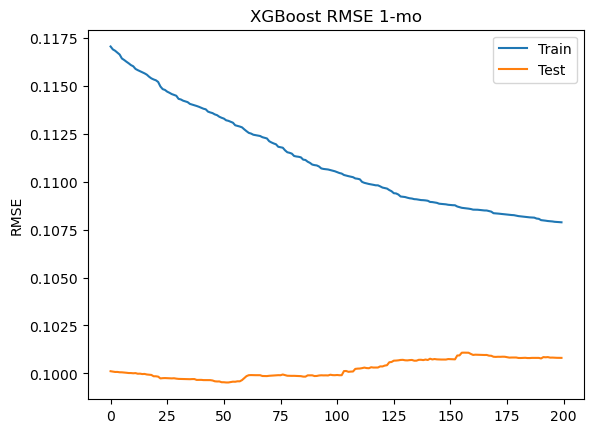

In [589]:
importlib.reload(plots)

plots.plot_xgboost_error(model_1m, 1)

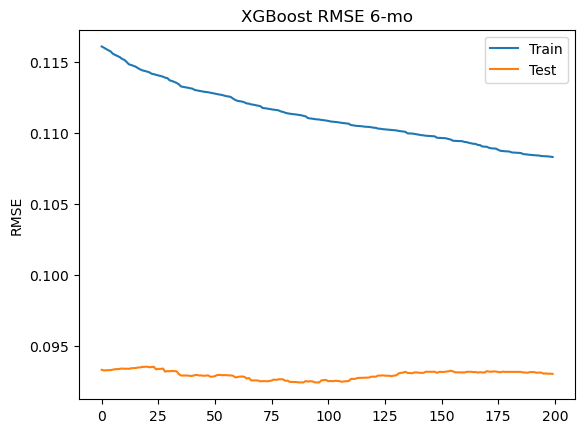

In [590]:
importlib.reload(plots)

plots.plot_xgboost_error(model_6m, 6)

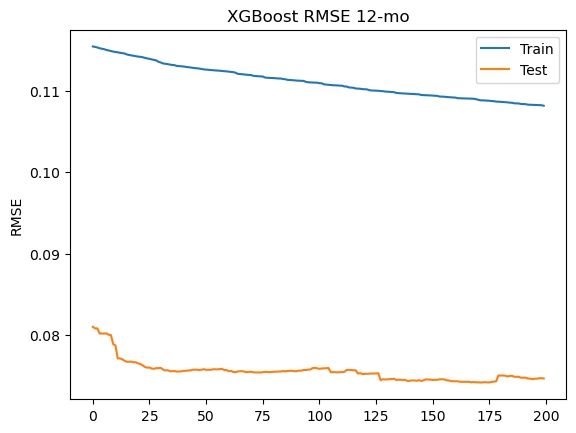

In [591]:
importlib.reload(plots)

plots.plot_xgboost_error(model_12m, 12)